In [1]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install statsmodels

     |████████████████████████████████| 16.8 MB 9.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.7 MB 6.7 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 88.8 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 11.3 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.3 MB 50.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 48.1 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 87.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('UDEMY_TSA_FINAL/Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [4]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [6]:
df.index.freq='MS'

In [14]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
mpl.rcParams['figure.figsize'] = (20, 10)

In [8]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [10]:
fitted_model  = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [11]:
test_prediction = fitted_model.forecast(36)

In [12]:
test_prediction

1958-02-01    339.143009
1958-03-01    399.281722
1958-04-01    394.233627
1958-05-01    402.545241
1958-06-01    473.128692
1958-07-01    521.795312
1958-08-01    514.513663
1958-09-01    446.216941
1958-10-01    385.431071
1958-11-01    339.645187
1958-12-01    381.455745
1959-01-01    401.210224
1959-02-01    387.159215
1959-03-01    455.812426
1959-04-01    450.049617
1959-05-01    459.537998
1959-06-01    540.114725
1959-07-01    595.671614
1959-08-01    587.359022
1959-09-01    509.392781
1959-10-01    440.000786
1959-11-01    387.732492
1959-12-01    435.462630
1960-01-01    458.013968
1960-02-01    441.973603
1960-03-01    520.346805
1960-04-01    513.768091
1960-05-01    524.599847
1960-06-01    616.584706
1960-07-01    680.007396
1960-08-01    670.517898
1960-09-01    581.513120
1960-10-01    502.296537
1960-11-01    442.628045
1960-12-01    497.115864
1961-01-01    522.860042
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Month'>

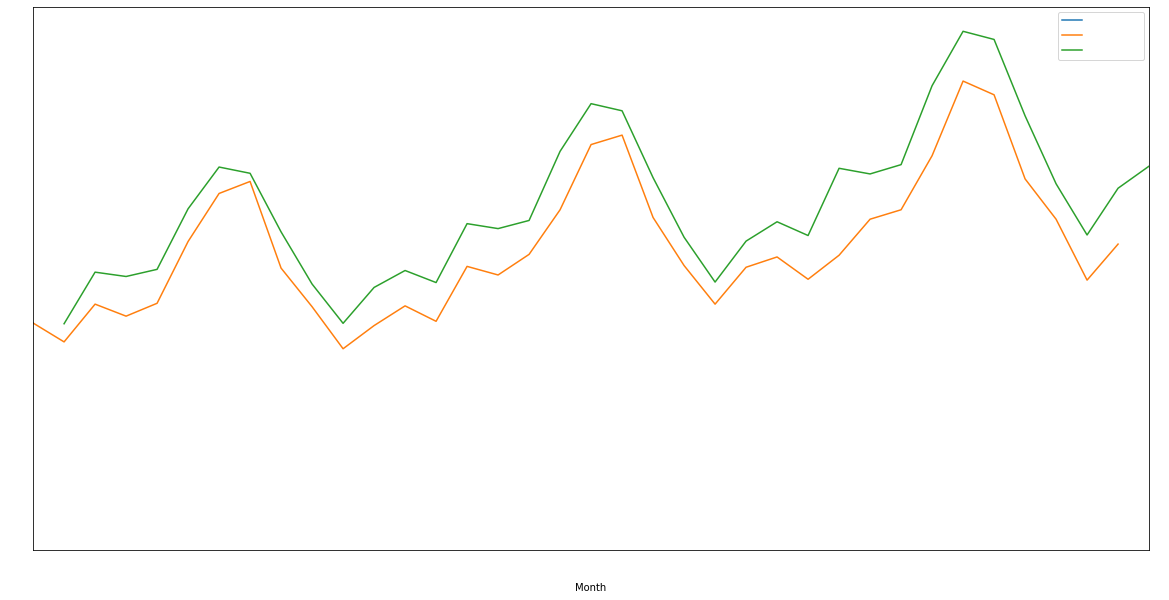

In [15]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST')
test_prediction.plot(legend=True,label='Prediction',xlim=['1958-01-01','1961-01-01'])

In [17]:
%pip install sklearn

     |████████████████████████████████| 26.7 MB 6.5 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 99.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=884feaf6a6e526186eeb49fd12c3844b47ff476b6b1f1b5646ffb0129b95fce4
  Stored in directory: /home/gitpod/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [19]:
mean_absolute_error(test_data,test_prediction)

63.03110341953488

In [20]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [22]:
np.sqrt(mean_squared_error(test_data,test_prediction))

74.92832260253114

In [23]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

/home/gitpod/.pyenv/versions/3.8.12/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [26]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot:xlabel='Month'>

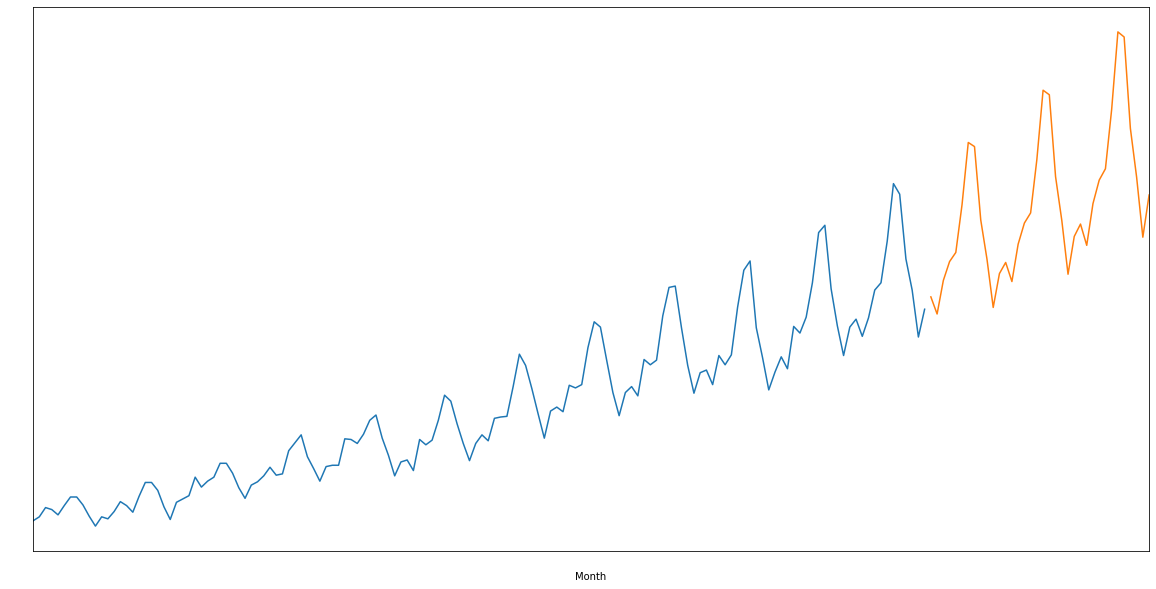

In [28]:
df['Thousands of Passengers'].plot()
forecast_predictions.plot()

In [29]:
df2 = pd.read_csv('UDEMY_TSA_FINAL/Data/samples.csv',index_col=0,parse_dates=True)

In [30]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot:>

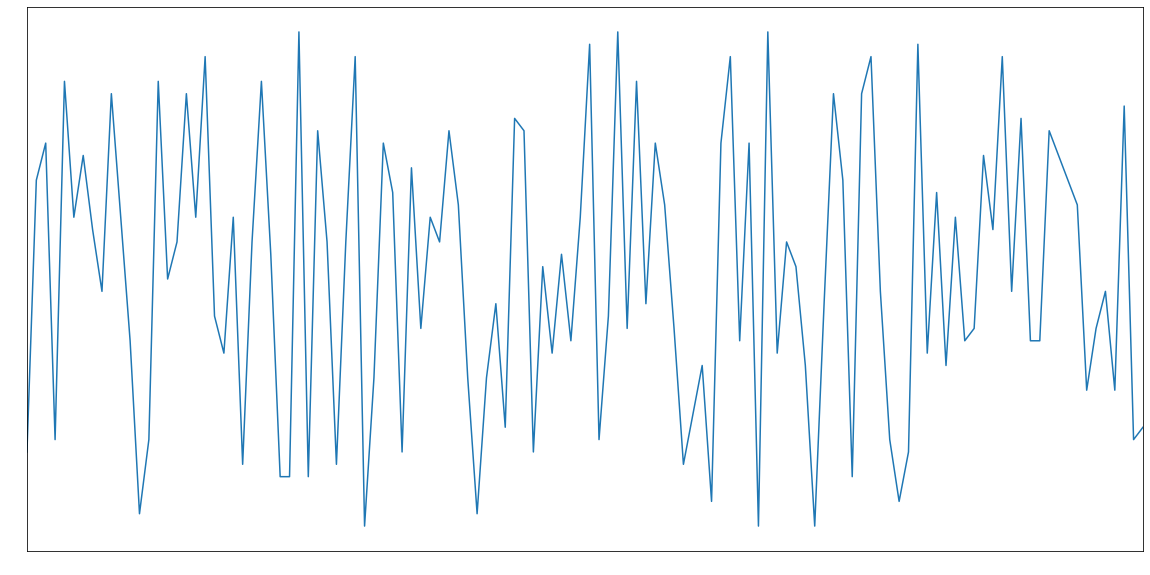

In [31]:
df2['a'].plot()

<AxesSubplot:>

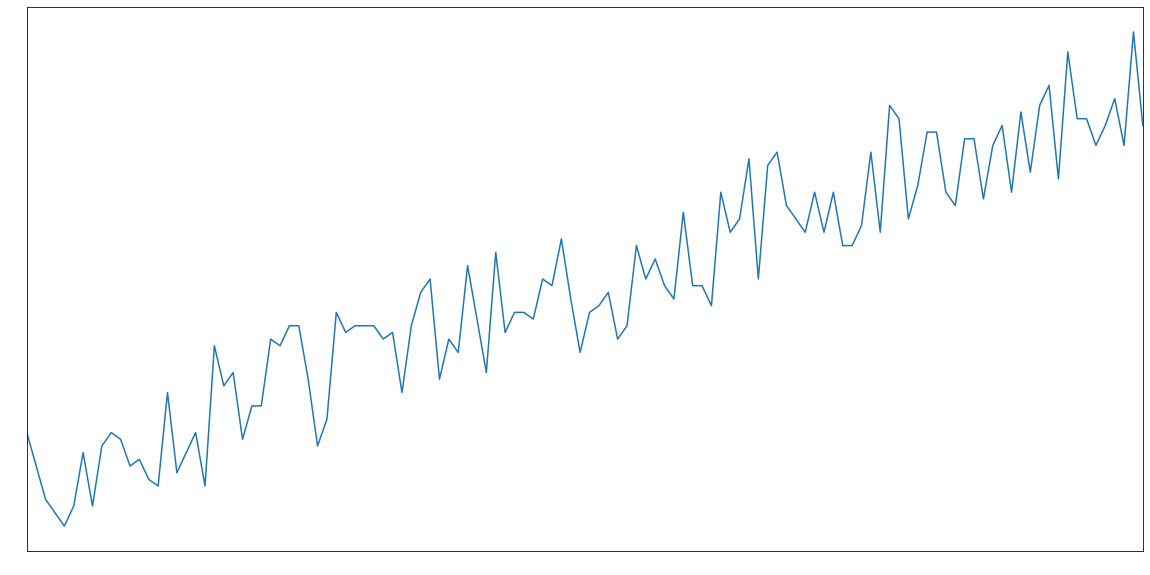

In [32]:
df2['b'].plot()

In [33]:
from statsmodels.tsa.statespace.tools import diff

In [36]:
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

<AxesSubplot:>

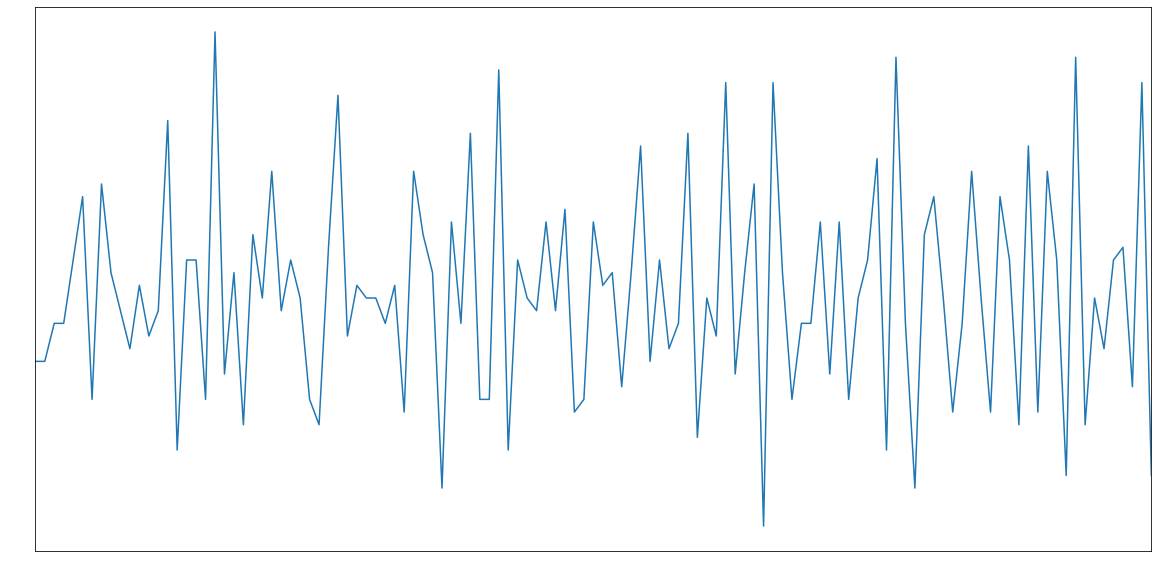

In [38]:
diff(df2['b'],k_diff=1).plot()